# Singular Value Decomposition (SVD)
**"SVD is not nearly as famous as it should be." - Gilbert Strang**

**We would clearly expect that the words that appear most frequently in one topic would appear less frequently in the other - otherwise that word wouldn't make a good choice to separate out the two topics. Therefore, we expect the topics to be orthogonal.**

**The SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows (along with a diagonal matrix, which contains the relative importance of each factor).**

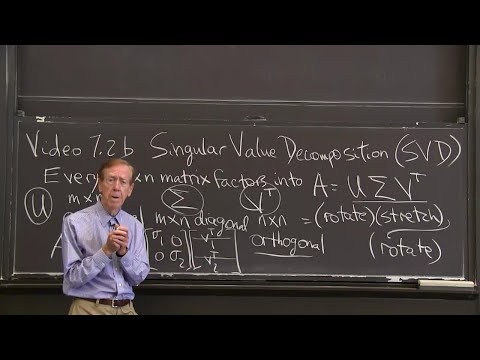

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo("mBcLRGuAFUk")

In [14]:
pwd

'/content'

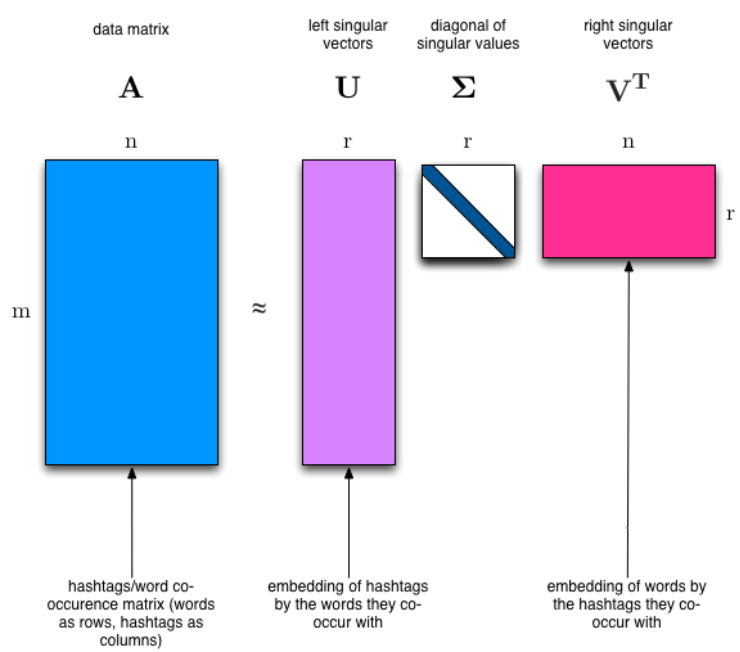

In [15]:
from IPython.display import Image
Image(filename='SVD.PNG')

# Column vector of left singular vector (U) form an orthonormal set

# Row vector of right singular vector (VT) form an orthonormal set

# SINGULAR VALUES

**It is a diagonal matrix**

**Singular values are arranged in the descending order.**

**Highest order dimension captures the most variance in the original dataset or most of the information realted to TF-IDF matrix.**

**The next higher dimension captures the next higher variance in the original data set.**

**Singular values reflect the major associated patterns in the data, and ignores the smaller, less important influences.**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc


if __name__ == "__main__":
    x = scipy.misc.face(gray=True)
    plt.imshow(x, cmap='gray')
    plt.show()
    U,S,V = np.linalg.svd(x, full_matrices=False)
    print(U.shape, S.shape, V.shape)
    for i in range(10,40):
        new_image = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(V[:i, :])
        print()
        print("Left Singular Vector/Column","  ","Singular Values","  ","Right Singular Vector/Row")
        print(np.matrix(U[:, :i]).shape,"                          ",np.diag(S[:i]).shape,"      ",np.matrix(V[:i, :]).shape)
        print(np.matrix(U[:, :i]).shape,"                          ",np.diag(S[:i]).shape,"      ",np.matrix(V[:i, :]).shape)
        print()
        plt.imshow(new_image, cmap='gray')
        title = "singular values used = %s" % i
        plt.title(title)
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc


if __name__ == "__main__":
    x = scipy.misc.face(gray=True)
    plt.imshow(x, cmap='gray')
    plt.show()
    U,S,V = np.linalg.svd(x, full_matrices=False)
    print(U.shape, S.shape, V.shape)
    for i in range(10,40):
        new_image = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(V[:i, :])
        print()
        print("Left Singular Vector/Column","  ","Singular Values","  ","Right Singular Vector/Row")
        print(np.matrix(U[:, :i]).shape,"                          ",np.diag(S[:i]).shape,"      ",np.matrix(V[:i, :]).shape)
        print(np.matrix(U[:, :i]).shape,"                          ",np.diag(S[:i]).shape,"      ",np.matrix(V[:i, :]).shape)
        print()
        plt.imshow(new_image, cmap='gray')
        title = "singular values used = %s" % i
        plt.title(title)
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [18]:
x

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [19]:
x.shape

(768, 1024)

**SVD is an exact decomposition, since the matrices it creates are big enough to fully cover the original matrix. SVD is extremely widely used in linear algebra, and specifically in data science, including:**

**semantic analysis**

**collaborative filtering / recommendations (winning entry for Netflix Prize)**

**calculate Moore-Penrose pseudoinverse**

**data compression**

**principal component analysis**

**Latent Semantic Analysis (LSA) uses SVD. You will sometimes hear topic modelling referred to as LSA.**

# TOPIC MODELING WITH SVD

# TOPIC MODELING is Unsupervised method

# The problem
**Topic modeling is a fun way to start our study of NLP. We will use popular matrix decomposition technique.**

**We start with a term-document matrix:**

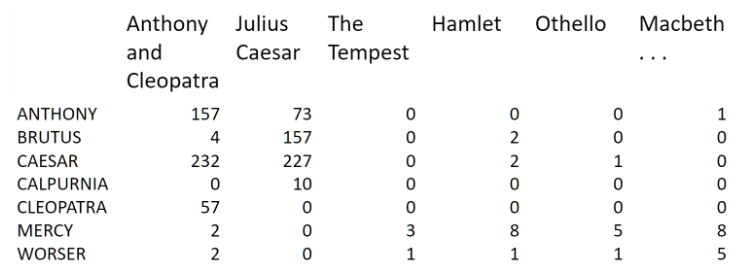

In [20]:
from IPython.display import Image
Image(filename='Bag of Words topic modeling.PNG')

We can decompose this into one tall thin matrix times one wide short matrix (possibly with a diagonal matrix in between).

Notice that this representation does not take into account word order or sentence structure. It's an example of a bag of words approach.

Latent Semantic Analysis (LSA) uses Singular Value Decomposition (SVD).

# Getting started

**We'll take a dataset of documents in several different categories, and find topics (consisting of groups of words) for them. Knowing the actual categories helps us evaluate if the topics we find make sense.**

**We will try this with matrix factorizations: Singular Value Decomposition (SVD)**

In [21]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline
np.set_printoptions(suppress=True)

# Look at our data

Scikit Learn comes with a number of built-in datasets, as well as loading utilities to load several standard external datasets. This is a great resource, and the datasets include Boston housing prices, face images, patches of forest, diabetes, breast cancer, and more. We will be using the newsgroups dataset.

Newsgroups were discussion groups on Usenet, which was popular in the 80s and 90s before the web really took off. This dataset includes 18,000 newsgroups posts with 20 topics.

# TOPIC MODELING IS AN UNSUPERVISED PROBLEM AND YOU DON'T KNOW WHAT THE RIGHT ANSWER IS. I.E. WHAT ARE THE BEST TOPICS FOR YOUR GROUP OF DOCUMENTS

In [23]:
%time
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


In [24]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

Let's look at some of the data. Can you guess which category these messages are in?

In [25]:
print("\n\n\n******@@@@******".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


******@@@@******

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.


******@@@@******
 >In article <1993Apr19.

hint: definition of perijove is the point in the orbit of a satellite of Jupiter nearest the planet's center

In [26]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

The target attribute is the integer index of the category.

In [27]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

# Most Clustering Analysis you have to choose how many topics you want to create.

In [28]:
num_topics, num_top_words = 6, 8

# Stop words, stemming, lemmatization
# Stop words
From Intro to Information Retrieval:

Some extremely common words which would appear to be of little value in helping select documents matching a user needs to excluded from the vocabulary entirely. These words are called stop words.

The general trend in IR systems over time has been from standard use of quite large stop lists (200-300 terms) to very small stop lists (7-12 terms) to no stop list whatsoever. Web search engines generally do not use stop lists.

# NLTK

# There is no single universal list of stop words.

# Stemming and Lemmatization

In [33]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [34]:
from nltk import stem

In [35]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

# Stemming is a crude heuristic that chops the ends off of words. Stemming is Faster. There is no canonical way what happens.

In [36]:
word_list = ['feet', 'foot', 'foots', 'footing']

In [37]:
[wnl.lemmatize(word) for word in word_list]

['foot', 'foot', 'foot', 'footing']

In [38]:
[porter.stem(word) for word in word_list]

['feet', 'foot', 'foot', 'foot']

# Data Processing

Next, scikit learn has a method that will extract all the word counts for us.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [40]:
import nltk

# categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

In [41]:
vectorizer = CountVectorizer(stop_words='english')

In [42]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

In [43]:
vectors

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [44]:
print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [45]:
vocab = np.array(vectorizer.get_feature_names_out())

In [46]:
vocab.shape

(26576,)

In [47]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype=object)

In [48]:
vocab_list = list(vocab)

In [49]:
len(vocab_list)

26576

In [50]:
vocab_set = set(vocab_list)

In [51]:
len(vocab_set)

26576


# Show the excel sheet here

# When are the set of vectors ortho-normal ?

# Ans: Orthogonal (90 Degress) and magnitude is 1

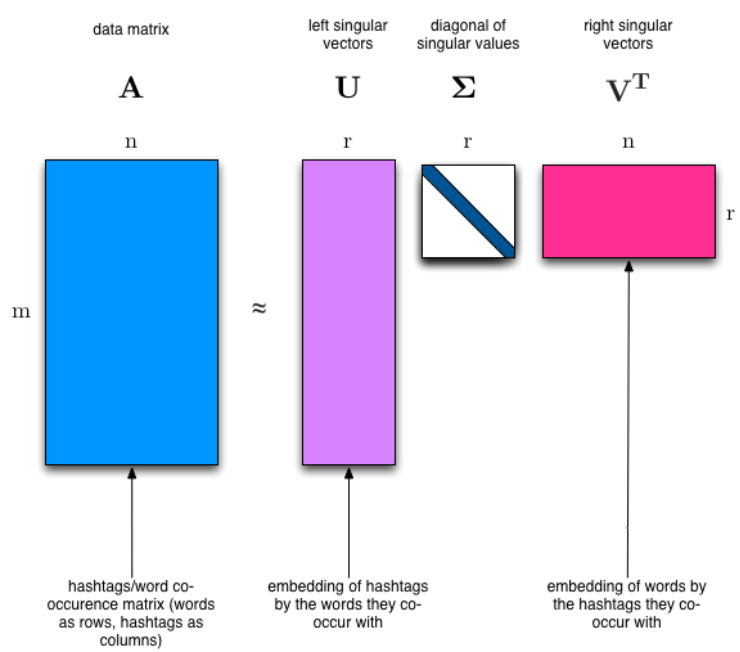

In [53]:
from IPython.display import Image
Image(filename='SVD.PNG')

# vectors term document matrix

In [54]:
vectors

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [55]:
vectors.shape

(2034, 26576)

# full_matrices = false otherwise what it does is it will come up with extra columns for U and extra rows for V to make fully an orthonormal basis.

In [56]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 39s, sys: 1.22 s, total: 1min 41s
Wall time: 1min 6s


In [57]:
U.shape

(2034, 2034)

In [58]:
s.shape

(2034,)

In [59]:
Vh.shape

(2034, 26576)

In [60]:
print(U.shape,s.shape,Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


# Confirm this is a decomposition of the input matrix.

In [61]:
reconstructed_vector = U @ np.diag(s) @ Vh

np.allclose(reconstructed_vector, vectors)

True

In [62]:
np.allclose(reconstructed_vector, vectors)

True

In [63]:
reconstructed_vector

array([[-0., -0.,  0., ...,  0.,  0.,  0.],
       [-0.,  0., -0., ...,  0.,  0.,  0.],
       [-0.,  0., -0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0., -0., ..., -0., -0., -0.],
       [ 0.,  0., -0., ...,  0.,  0., -0.],
       [ 0.,  0., -0., ...,  0.,  0., -0.]])

In [64]:
vectors

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [65]:
s.shape

(2034,)

In [66]:
s[:4]

array([433.92698542, 291.51012741, 240.71137677, 220.00048043])

In [67]:
np.diag(s[:4])

array([[433.92698542,   0.        ,   0.        ,   0.        ],
       [  0.        , 291.51012741,   0.        ,   0.        ],
       [  0.        ,   0.        , 240.71137677,   0.        ],
       [  0.        ,   0.        ,   0.        , 220.00048043]])

In [68]:
np.diag(np.diag(s[:4]))

array([433.92698542, 291.51012741, 240.71137677, 220.00048043])

# Confirm that U, Vh are orthonormal

In [69]:
U.shape

(2034, 2034)

In [70]:
U

array([[-0.00477991,  0.00271988, -0.00121236, ..., -0.        ,
        -0.        ,  0.        ],
       [-0.0002213 , -0.00017499, -0.00107815, ...,  0.        ,
         0.        , -0.        ],
       [-0.00063693, -0.00074229, -0.00083183, ...,  0.        ,
         0.        , -0.        ],
       ...,
       [-0.00138527, -0.00073518, -0.00023316, ...,  0.        ,
        -0.        ,  0.        ],
       [-0.00217183,  0.00068095, -0.00956545, ..., -0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [71]:
UTranspose = U.T

In [72]:
UTranspose

array([[-0.00477991, -0.0002213 , -0.00063693, ..., -0.00138527,
        -0.00217183,  0.        ],
       [ 0.00271988, -0.00017499, -0.00074229, ..., -0.00073518,
         0.00068095,  0.        ],
       [-0.00121236, -0.00107815, -0.00083183, ..., -0.00023316,
        -0.00956545,  0.        ],
       ...,
       [-0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.        ,  0.        ],
       [-0.        ,  0.        ,  0.        , ..., -0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.        , -0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [73]:
U.shape[0]

2034

In [74]:
np.eye(U.shape[0])

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [75]:
np.allclose(UTranspose @ U, np.eye(U.shape[0]))

True

In [76]:
Vh.shape[0]

2034

In [77]:
np.eye(Vh.shape[0])

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [78]:
np.allclose(Vh @ Vh.T, np.eye(Vh.shape[0]))

True

# What can we say about the singular values s?

In [79]:
s

array([433.92698542, 291.51012741, 240.71137677, ...,   0.        ,
         0.        ,   0.        ])

Using SVD you can you can choose the dimensions (axes) in your vectors with the greatest spread or variance in the word frequency.


LSA or SVD you can discard those dimensions (topic) that have the least amount of variance between documents.


These low-variance topics are usually distractions, noise, for any machine learning algorithm.

# LSA compresses more meaning into fewer dimensions. We only have to retain the high-variance dimensions.


# These High variance dimensions becomes your "topoics", with some weighted combination of all the words captured in each one.

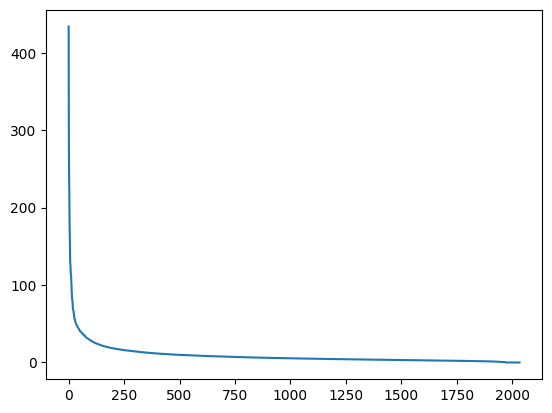

In [80]:
plt.plot(s);

In [81]:
len(s)

2034

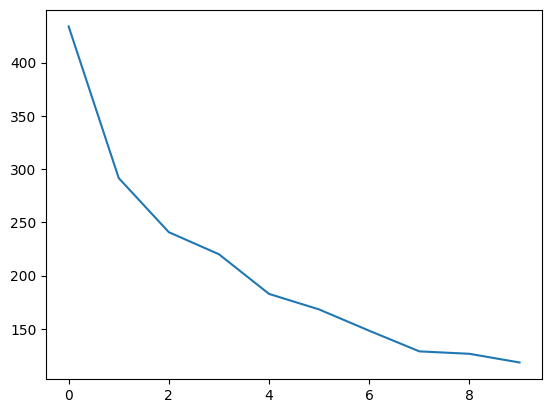

In [82]:
plt.plot(s[:10])

In [83]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [84]:
show_topics(Vh[:10])

['critus ditto propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

# We are not getting definitive topic that exactly match what we thought the topics were of our source data but these are sensical outputs we need to infer the topics from this list of words.

# The important takeaway is that we have a tool that allows us to exactly factor a matrix into orthogonal columns and orthogonal rows.

In [85]:
len(show_topics(Vh))

2034

In [86]:
Vh.shape

(2034, 26576)

In [87]:
Vh.shape

(2034, 26576)

In [88]:
topics=[]
for i in range(0,Vh.shape[0]):
    topics.append("Topic "+ str(i+1))

In [89]:
len(vocab)

26576

In [90]:
import pandas as pd
V_df=pd.DataFrame(Vh,index=topics,columns=list(vocab))

In [91]:
V_df

,00,000,0000,00000,000000,000005102000,000062david42,0001,000100255pixel,00041032,...,zurich,zurvanism,zus,zvi,zwaartepunten,zwak,zwakke,zware,zwarte,zyxel
Topic 1,-0.009410,-0.011453,-0.000022,-0.000043,-0.000124,-0.001078,-0.000052,-0.000004,-0.000006,-0.000022,...,-0.001078,-0.000042,-0.000001,-0.001078,-5.717988e-06,-5.717988e-06,-5.717988e-06,-5.717988e-06,-1.143598e-05,-0.001092
Topic 2,-0.003567,-0.017692,-0.000030,-0.000061,-0.000291,-0.001856,-0.000072,-0.000005,0.000003,-0.000030,...,-0.001856,-0.000034,0.000001,-0.001856,-7.731244e-06,-7.731244e-06,-7.731244e-06,-7.731244e-06,-1.546249e-05,-0.001855
Topic 3,0.000950,-0.022828,-0.000023,-0.000047,-0.000468,0.001512,-0.000164,-0.000020,-0.000003,-0.000023,...,0.001512,-0.000270,-0.000005,0.001512,-1.220196e-05,-1.220196e-05,-1.220196e-05,-1.220196e-05,-2.440392e-05,0.001505
Topic 4,-0.001871,-0.011435,-0.000039,-0.000078,-0.000594,0.000927,-0.000083,0.000015,0.000002,-0.000039,...,0.000927,0.000197,0.000004,0.000927,-5.923786e-06,-5.923786e-06,-5.923786e-06,-5.923786e-06,-1.184757e-05,0.000936
Topic 5,0.003848,0.004602,0.000023,0.000046,-0.000442,-0.002646,0.000063,0.000004,0.000003,0.000023,...,-0.002646,0.000047,-0.000001,-0.002646,-1.323223e-05,-1.323223e-05,-1.323223e-05,-1.323223e-05,-2.646446e-05,-0.002665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Topic 2030,-0.001980,-0.000581,0.000092,-0.000309,0.000240,-0.000412,0.000310,-0.007086,0.000200,0.000433,...,0.000032,-0.000277,-0.000171,0.000032,1.854813e-05,1.854813e-05,1.854813e-05,1.854813e-05,3.709627e-05,0.000187
Topic 2031,0.002882,0.002323,-0.000356,0.000222,0.000332,0.000444,-0.001603,-0.010037,0.000055,0.000947,...,0.000047,-0.000062,-0.000200,0.000047,-1.498353e-05,-1.498353e-05,-1.498353e-05,-1.498353e-05,-2.996706e-05,-0.000034
Topic 2032,-0.003446,-0.001770,0.000401,-0.001507,-0.000157,0.000098,0.000886,0.009228,0.000296,0.000130,...,0.000029,-0.000552,-0.000397,0.000029,-1.162139e-07,-1.162139e-07,-1.162139e-07,-1.162139e-07,-2.324277e-07,0.000118
Topic 2033,-0.006064,-0.000840,-0.000658,-0.001158,0.000022,-0.000226,0.001570,0.010729,0.000191,-0.000185,...,0.000013,0.000156,-0.000128,0.000013,1.210667e-05,1.210667e-05,1.210667e-05,1.210667e-05,2.421334e-05,0.000112


In [92]:
df1_transposed = V_df.T

In [93]:

df1_transposed

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 2025,Topic 2026,Topic 2027,Topic 2028,Topic 2029,Topic 2030,Topic 2031,Topic 2032,Topic 2033,Topic 2034
00,-0.009410,-0.003567,0.000950,-0.001871,0.003848,-0.000233,0.005567,-0.002181,-0.000392,0.003066,...,0.000264,0.003826,4.450141e-03,-0.004751,6.943138e-06,-0.001980,0.002882,-3.446075e-03,-0.006064,-2.872889e-04
000,-0.011453,-0.017692,-0.022828,-0.011435,0.004602,-0.013262,0.009913,-0.043220,0.004949,-0.014373,...,0.000124,0.001059,-1.233139e-04,-0.001839,-2.090956e-04,-0.000581,0.002323,-1.770178e-03,-0.000840,1.547751e-03
0000,-0.000022,-0.000030,-0.000023,-0.000039,0.000023,-0.000007,0.000050,-0.000126,0.000003,-0.000004,...,0.003765,-0.000018,-5.750231e-04,0.000045,5.626648e-04,0.000092,-0.000356,4.010957e-04,-0.000658,-1.526630e-04
00000,-0.000043,-0.000061,-0.000047,-0.000078,0.000046,-0.000014,0.000101,-0.000251,0.000006,-0.000008,...,0.006238,0.000719,-1.597275e-03,-0.001140,3.504702e-04,-0.000309,0.000222,-1.507496e-03,-0.001158,3.120062e-05
000000,-0.000124,-0.000291,-0.000468,-0.000594,-0.000442,0.000071,0.001058,-0.000926,0.000172,0.001970,...,0.000265,-0.000007,3.459040e-04,-0.000061,-1.227449e-05,0.000240,0.000332,-1.571899e-04,0.000022,-1.625874e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwak,-0.000006,-0.000008,-0.000012,-0.000006,-0.000013,-0.000014,0.000018,0.000038,-0.000013,-0.000036,...,0.000004,-0.000003,-4.439475e-08,0.000007,-9.975896e-07,0.000019,-0.000015,-1.162139e-07,0.000012,2.436095e-07
zwakke,-0.000006,-0.000008,-0.000012,-0.000006,-0.000013,-0.000014,0.000018,0.000038,-0.000013,-0.000036,...,0.000004,-0.000003,-4.439475e-08,0.000007,-9.975896e-07,0.000019,-0.000015,-1.162139e-07,0.000012,2.436095e-07
zware,-0.000006,-0.000008,-0.000012,-0.000006,-0.000013,-0.000014,0.000018,0.000038,-0.000013,-0.000036,...,0.000004,-0.000003,-4.439475e-08,0.000007,-9.975896e-07,0.000019,-0.000015,-1.162139e-07,0.000012,2.436095e-07
zwarte,-0.000011,-0.000015,-0.000024,-0.000012,-0.000026,-0.000028,0.000036,0.000075,-0.000026,-0.000072,...,0.000007,-0.000006,-8.878949e-08,0.000015,-1.995179e-06,0.000037,-0.000030,-2.324277e-07,0.000024,4.872190e-07


In [94]:
df1_transposed.sort_values(by=['Topic 1'],ascending=False).head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 2025,Topic 2026,Topic 2027,Topic 2028,Topic 2029,Topic 2030,Topic 2031,Topic 2032,Topic 2033,Topic 2034
critus,2.045728e-21,2.692340e-21,1.601276e-20,-9.653215e-21,4.305145e-21,-3.151284e-20,-5.287765e-21,1.418051e-20,2.322922e-20,-1.861456e-20,...,1.859734e-21,-7.814774e-17,-1.954235e-16,1.341595e-17,-1.922436e-20,2.973550e-22,1.107583e-17,1.835762e-17,-1.523174e-16,-1.067407e-16
ditto,-1.843763e-21,7.954696e-20,-7.234701e-20,-3.776804e-20,-2.725505e-19,1.246185e-19,-4.303119e-20,-1.776027e-19,1.323687e-20,-8.148459e-20,...,8.504148e-18,3.476729e-17,7.983319e-17,-1.890539e-16,-1.531120e-16,-2.472483e-16,-1.126716e-16,-2.418280e-16,9.867176e-17,-8.069722e-17
propagandist,-3.738304e-10,-5.153684e-10,-7.562343e-09,8.138907e-09,-2.127459e-09,5.884147e-09,8.550363e-10,2.465379e-09,1.252068e-09,-1.125321e-09,...,-2.513905e-04,1.252023e-04,-1.022030e-05,1.371503e-04,-5.623723e-05,2.048990e-04,7.438361e-05,1.135239e-04,3.882148e-05,8.523385e-05
surname,-1.174232e-09,-1.332606e-09,-2.898077e-08,3.756904e-08,-3.788944e-09,-1.623507e-08,-1.853367e-09,-1.020855e-08,-1.181942e-08,5.392053e-09,...,-1.327743e-06,2.354588e-04,-1.164137e-04,-2.241249e-04,-1.592969e-05,-3.431306e-04,-1.758018e-04,-7.027566e-04,-2.099624e-04,-1.295149e-04
galacticentric,-2.332570e-09,-3.276527e-09,-7.793502e-08,1.111007e-07,-5.459312e-09,-2.600407e-07,4.466718e-09,-2.077028e-08,-3.249680e-08,9.648635e-10,...,4.560182e-04,1.007615e-04,1.476870e-04,7.599719e-05,1.200072e-04,-3.192544e-04,2.074318e-04,-4.011655e-04,3.874425e-04,-4.337681e-04
kindergarten,-5.129201e-09,-7.324265e-09,-1.439858e-07,1.812780e-07,-1.115104e-08,1.917285e-07,1.285753e-08,-1.666088e-08,-2.464017e-07,2.750448e-07,...,-1.691071e-04,-1.090826e-04,-3.091355e-05,2.776672e-04,-3.338952e-05,1.841011e-04,-5.875403e-05,7.023638e-05,-5.662067e-06,-2.762859e-04
surreal,-2.416347e-08,-1.266649e-08,-1.290512e-07,-1.190570e-09,1.255053e-08,1.523565e-07,3.995952e-07,-3.524271e-08,-2.296047e-07,-1.377579e-07,...,-7.338876e-05,8.550890e-05,-4.476377e-05,1.149441e-04,-1.999266e-05,-8.145087e-06,1.200505e-04,1.394610e-04,-7.369825e-05,-6.782617e-05
imaginative,-2.791795e-08,-9.093059e-08,-4.730401e-07,1.904208e-07,-2.012329e-07,1.068203e-06,1.674384e-06,1.517511e-06,2.708433e-06,1.045257e-05,...,-9.483099e-04,-1.343275e-04,-3.254798e-04,1.632926e-04,-2.905200e-05,8.433447e-04,1.238325e-04,1.148986e-03,-1.291622e-05,-2.016383e-04
salvadorans,-2.795680e-08,-7.308028e-08,-1.681913e-07,1.715696e-07,3.359392e-08,2.708662e-07,-2.573693e-07,6.411654e-07,-4.055395e-07,4.954364e-07,...,4.719525e-04,3.986459e-04,-6.454974e-04,3.103430e-07,9.166819e-06,-8.455134e-04,1.225842e-04,8.464765e-05,-7.887479e-04,1.144250e-03
ahhh,-2.985946e-08,-5.368459e-08,-3.170858e-07,4.158124e-07,-2.440320e-08,1.203659e-06,5.933514e-08,-1.454605e-07,-7.134350e-07,7.077523e-07,...,2.451268e-04,4.284669e-04,-1.076373e-04,5.974861e-04,7.138108e-08,-1.122441e-04,5.032651e-04,-5.035697e-05,-3.614026e-04,-2.323749e-04


In [95]:
df1_transposed.sort_values(by=['Topic 2'],ascending=False).head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 2025,Topic 2026,Topic 2027,Topic 2028,Topic 2029,Topic 2030,Topic 2031,Topic 2032,Topic 2033,Topic 2034
jpeg,-0.373448,0.549092,0.020282,-0.067319,-0.207207,-0.013555,0.024867,-0.067112,0.005916,-0.033361,...,0.006785,0.002688,0.001670,-0.000962,0.001646,-0.004507,-0.001748,-0.003740,-0.001331,0.003165
gif,-0.156232,0.205243,0.008075,-0.029714,-0.077174,-0.004685,0.024235,-0.050720,0.003500,-0.011498,...,0.003496,-0.000672,0.000531,-0.001207,0.000791,-0.003491,0.000478,-0.001216,-0.001372,0.001791
file,-0.187758,0.132324,0.041304,-0.002122,-0.083988,0.002065,-0.000342,-0.043850,0.002077,-0.031282,...,-0.002097,-0.000429,0.000530,0.000863,-0.000510,0.001479,-0.000101,0.002121,0.000231,-0.000750
color,-0.128247,0.125738,0.010892,-0.020267,0.008315,-0.005175,0.008307,-0.007878,-0.002489,-0.027755,...,-0.015248,-0.003378,-0.000663,0.005538,-0.004038,0.013456,0.003153,0.010684,0.004287,-0.005515
quality,-0.076324,0.107456,-0.004631,-0.015590,-0.030939,-0.006403,-0.003901,-0.009563,0.008374,-0.005955,...,0.000759,0.000515,-0.001070,-0.001454,-0.000274,-0.000932,-0.001503,-0.000865,0.000936,0.000630
image,-0.325060,0.090860,0.054273,-0.023941,0.439534,-0.031195,-0.085103,0.300941,-0.059688,0.177242,...,0.002651,0.000196,0.001366,-0.000498,0.000829,-0.002034,0.000225,-0.000935,-0.001161,0.000659
jfif,-0.048903,0.074445,0.002003,-0.009380,-0.027389,-0.001757,0.003786,-0.010242,0.000961,-0.004854,...,0.000148,-0.000592,0.000113,0.000640,0.000003,0.000163,0.000470,0.000455,0.000631,-0.000371
format,-0.135041,0.063814,0.039513,-0.000157,-0.049893,-0.003985,0.000601,-0.043405,0.004172,-0.034327,...,0.002158,0.001378,-0.000496,-0.000375,0.000379,-0.001322,0.000642,-0.001491,-0.000301,0.000812
bit,-0.081237,0.061964,0.006024,-0.004381,-0.012803,-0.006446,-0.002945,-0.013049,0.001807,-0.007820,...,0.002248,0.000664,-0.000177,-0.000437,0.000313,-0.001577,-0.000883,-0.000562,0.000008,0.000653
version,-0.101190,0.058012,0.003858,0.006558,0.023070,0.006372,-0.006503,0.024961,-0.003933,0.032259,...,-0.000536,0.000356,0.000754,0.001172,-0.000362,-0.000487,-0.000792,0.000170,-0.000251,-0.001591


In [96]:
df1_transposed.sort_values(by=['Topic 3'],ascending=False).head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 2025,Topic 2026,Topic 2027,Topic 2028,Topic 2029,Topic 2030,Topic 2031,Topic 2032,Topic 2033,Topic 2034
graphics,-0.179242,-0.190291,0.164316,0.089067,-0.185929,-0.004142,-0.076652,0.065522,-0.005240,-0.025458,...,0.000635,0.000169,-0.000963,-0.000966,0.000363,-0.001214,-0.002320,-0.000650,0.000818,0.000323
edu,-0.228827,-0.249180,0.156033,0.070218,-0.124267,0.002615,-0.010474,0.048469,-0.017414,0.046494,...,0.001133,0.003264,-0.000790,0.002778,-0.000756,-0.001064,0.000317,-0.000590,-0.000564,0.000495
pub,-0.144734,-0.158989,0.116928,0.053538,-0.124771,-0.002536,-0.024068,0.012182,-0.001548,-0.005960,...,-0.003219,-0.002305,-0.000390,-0.001044,-0.000445,0.001500,-0.001522,0.000832,-0.000148,-0.001594
mail,-0.094551,-0.117368,0.082630,0.043078,-0.117864,0.002561,-0.015921,0.036395,-0.006588,0.028643,...,-0.001225,-0.000825,0.000258,-0.000880,-0.000520,-0.000477,0.001097,-0.000029,-0.000192,0.000134
128,-0.071271,-0.107684,0.072207,0.037155,-0.075092,-0.001592,-0.022366,0.022399,-0.002762,0.006497,...,-0.002816,-0.002062,-0.000444,0.001171,0.000227,0.002990,0.004029,0.001000,-0.001228,0.000017
3d,-0.064443,-0.101450,0.067808,0.039763,-0.061929,-0.000863,-0.030464,0.006801,0.000618,-0.027360,...,-0.003022,0.000225,0.000724,-0.000322,-0.000529,0.001832,0.001816,0.000690,-0.001445,-0.000872
ray,-0.061986,-0.100226,0.060349,0.033816,-0.123491,0.003346,-0.006743,0.069703,0.006021,0.057027,...,0.000770,-0.000168,0.000401,-0.000915,0.000488,-0.000938,0.000279,-0.001021,-0.002903,0.000170
ftp,-0.141162,-0.099080,0.057992,0.005060,0.034001,0.000047,0.038583,-0.163018,0.014339,-0.065941,...,-0.002064,-0.000430,-0.000438,-0.000083,-0.000381,-0.000488,-0.002044,0.000054,-0.001130,0.000188
send,-0.071929,-0.094775,0.057127,0.038456,-0.099371,-0.002607,-0.003893,0.049104,-0.011404,0.018552,...,0.002287,-0.000861,0.000158,-0.002022,0.000995,-0.003308,-0.001557,-0.002236,-0.000409,0.001424
image,-0.325060,0.090860,0.054273,-0.023941,0.439534,-0.031195,-0.085103,0.300941,-0.059688,0.177242,...,0.002651,0.000196,0.001366,-0.000498,0.000829,-0.002034,0.000225,-0.000935,-0.001161,0.000659


In [97]:

df1_transposed.sort_values(by=['Topic 4'],ascending=False).head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 2025,Topic 2026,Topic 2027,Topic 2028,Topic 2029,Topic 2030,Topic 2031,Topic 2032,Topic 2033,Topic 2034
jesus,-0.019578,-0.010595,-0.234698,0.305544,-0.014026,-0.422576,-0.004119,-0.029091,-0.031251,0.023999,...,0.001021,0.000872,0.000225,0.000243,0.000297,-0.000244,0.000437,-0.000943,-0.000110,-0.000668
god,-0.020843,-0.009457,-0.202533,0.246563,-0.003883,0.314012,-0.055165,-0.029204,-0.151163,-0.004764,...,-0.000708,0.000380,-0.000058,0.000871,-0.000354,0.000786,0.000354,-0.000324,0.000165,-0.000559
matthew,-0.010823,-0.006355,-0.123078,0.155294,-0.007887,-0.262926,0.008828,-0.004399,0.012436,0.005769,...,-0.000498,0.000192,-0.000689,-0.000188,-0.000262,0.000062,-0.000448,-0.000534,0.001059,0.000074
people,-0.046209,-0.000194,-0.134615,0.151323,-0.009093,0.011031,0.001038,-0.048012,-0.017870,-0.018342,...,0.000534,0.001547,0.000317,0.000355,-0.000018,0.000269,-0.000282,0.000773,-0.000421,0.000950
atheists,-0.010272,-0.002745,-0.109730,0.134117,-0.003522,0.286291,-0.043872,-0.035391,-0.202144,-0.004104,...,0.002010,0.000878,-0.000487,-0.000459,0.000719,-0.002137,-0.001093,-0.001299,0.000054,0.000774
atheism,-0.010151,-0.005650,-0.083495,0.105671,-0.009327,0.214034,-0.030333,-0.020999,-0.121060,-0.001139,...,-0.000560,0.001445,0.000168,0.000823,-0.000408,0.000903,0.000164,0.000317,0.000279,-0.001125
does,-0.059065,0.029225,-0.097076,0.101018,0.017250,0.051053,-0.003362,-0.007426,0.024863,0.009276,...,0.000360,-0.000679,0.000327,0.000306,0.000193,0.000220,0.000901,0.000575,0.000060,-0.000091
graphics,-0.179242,-0.190291,0.164316,0.089067,-0.185929,-0.004142,-0.076652,0.065522,-0.005240,-0.025458,...,0.000635,0.000169,-0.000963,-0.000966,0.000363,-0.001214,-0.002320,-0.000650,0.000818,0.000323
religious,-0.006729,-0.002053,-0.070740,0.085919,-0.002259,0.160298,-0.025690,-0.022391,-0.128378,-0.000576,...,-0.000815,-0.001060,-0.000416,-0.000697,0.000020,-0.000236,0.000108,-0.000595,-0.000307,-0.000871
said,-0.012608,-0.002499,-0.083776,0.083837,-0.005874,-0.084558,-0.004922,-0.007290,0.005142,0.000873,...,-0.000029,0.000184,-0.000290,-0.000416,0.000176,-0.000816,0.000842,0.001055,-0.001588,0.000097


In [98]:
df1_transposed.sort_values(by=['Topic 5'],ascending=False).head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 2025,Topic 2026,Topic 2027,Topic 2028,Topic 2029,Topic 2030,Topic 2031,Topic 2032,Topic 2033,Topic 2034
image,-0.325060,0.090860,0.054273,-0.023941,0.439534,-0.031195,-0.085103,0.300941,-0.059688,0.177242,...,0.002651,0.000196,0.001366,-0.000498,0.000829,-0.002034,0.000225,-0.000935,-0.001161,0.000659
data,-0.154271,-0.165357,-0.025085,-0.074451,0.275291,-0.003960,-0.014746,-0.211248,0.004554,-0.171088,...,0.000821,-0.000548,-0.000252,-0.000217,-0.000227,0.000057,0.000614,-0.000326,-0.000633,0.000459
processing,-0.052967,-0.033585,0.010224,-0.007522,0.156816,-0.005191,-0.022232,0.082895,-0.015183,0.062679,...,0.004803,0.000285,-0.000313,-0.002532,0.001118,-0.003706,0.000629,-0.003227,0.000511,-0.000193
analysis,-0.040828,-0.039327,0.002367,-0.003084,0.135095,-0.005809,-0.011140,0.062547,-0.010971,0.039955,...,-0.003815,-0.001240,0.000125,-0.000102,-0.000786,0.001654,-0.001363,-0.000054,-0.001745,0.000414
software,-0.115359,-0.002483,0.027571,-0.003524,0.108167,-0.003459,-0.008908,0.022318,-0.000178,-0.006858,...,0.003137,0.001583,0.000506,-0.000600,0.000578,-0.002098,-0.000703,-0.002120,-0.000725,0.000752
available,-0.138999,-0.051750,0.009347,-0.029576,0.097409,0.004442,0.090857,-0.198120,0.022811,-0.054907,...,-0.003708,-0.002235,0.000232,0.002982,-0.000990,0.004279,0.002163,0.003925,-0.000517,-0.002175
tools,-0.032991,-0.019051,0.012124,0.001371,0.087139,-0.002876,-0.023673,0.070655,-0.012038,0.046601,...,-0.002761,-0.001336,-0.000758,0.001917,-0.001151,0.003566,0.000392,0.003769,0.000199,-0.000411
display,-0.079963,0.025104,0.011782,-0.006474,0.084961,-0.001222,-0.011121,-0.018773,-0.002314,-0.018149,...,0.001988,0.002156,-0.001533,-0.004252,0.000300,-0.002599,-0.002978,-0.004462,0.000890,0.000217
tool,-0.026209,-0.010541,0.003975,0.001146,0.082692,-0.005483,-0.017941,0.049108,-0.001662,0.030481,...,-0.000686,0.000126,0.000503,-0.000806,-0.000266,0.001052,0.001670,-0.001105,-0.000689,-0.000286
user,-0.041255,-0.018954,0.009186,-0.003723,0.079518,-0.003082,-0.016064,0.023846,-0.005566,0.014164,...,0.001303,-0.000092,-0.000372,0.000876,0.000007,-0.000270,-0.001692,0.000706,-0.000288,0.001179


In [99]:
df1_transposed.sort_values(by=['Topic 6'],ascending=False).head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 2025,Topic 2026,Topic 2027,Topic 2028,Topic 2029,Topic 2030,Topic 2031,Topic 2032,Topic 2033,Topic 2034
god,-0.020843,-0.009457,-0.202533,0.246563,-0.003883,0.314012,-0.055165,-0.029204,-0.151163,-0.004764,...,-0.000708,0.000380,-0.000058,0.000871,-0.000354,0.000786,0.000354,-0.000324,0.000165,-0.000559
atheists,-0.010272,-0.002745,-0.109730,0.134117,-0.003522,0.286291,-0.043872,-0.035391,-0.202144,-0.004104,...,0.002010,0.000878,-0.000487,-0.000459,0.000719,-0.002137,-0.001093,-0.001299,0.000054,0.000774
atheism,-0.010151,-0.005650,-0.083495,0.105671,-0.009327,0.214034,-0.030333,-0.020999,-0.121060,-0.001139,...,-0.000560,0.001445,0.000168,0.000823,-0.000408,0.000903,0.000164,0.000317,0.000279,-0.001125
religious,-0.006729,-0.002053,-0.070740,0.085919,-0.002259,0.160298,-0.025690,-0.022391,-0.128378,-0.000576,...,-0.000815,-0.001060,-0.000416,-0.000697,0.000020,-0.000236,0.000108,-0.000595,-0.000307,-0.000871
believe,-0.010758,-0.003277,-0.077766,0.078285,-0.003288,0.125260,-0.023700,-0.016237,-0.067597,-0.004861,...,-0.000845,-0.000773,0.000184,-0.000031,0.000013,0.000711,-0.000055,0.001891,-0.000295,0.000539
religion,-0.006929,-0.002783,-0.068025,0.080266,-0.002756,0.120854,-0.017155,-0.015224,-0.090085,0.006052,...,0.000014,-0.000249,0.000286,0.000004,0.000125,0.001141,0.000435,0.000331,-0.000002,0.000270
argument,-0.009577,0.002191,-0.054791,0.059772,-0.000882,0.120816,-0.011108,0.064153,0.411145,-0.064301,...,-0.001424,-0.000210,-0.000609,0.000854,-0.000314,0.001070,-0.000030,0.001546,0.001011,-0.001489
true,-0.015592,0.005416,-0.065800,0.071731,0.004460,0.095108,-0.011770,0.040954,0.195458,-0.019491,...,0.004351,0.000299,0.001498,-0.000126,0.001314,-0.002024,0.000233,-0.001200,-0.001293,0.000567
atheist,-0.004340,-0.001885,-0.041279,0.049650,-0.001826,0.093286,-0.011821,-0.009953,-0.060279,0.002872,...,-0.000029,-0.000652,0.000772,0.000335,-0.000255,0.001253,0.000634,0.000626,-0.000073,0.000312
example,-0.016357,-0.007873,-0.055171,0.050156,0.002168,0.092743,-0.008005,0.024896,0.211386,-0.030575,...,0.000279,-0.000247,0.000720,0.000923,0.000045,0.000576,-0.000464,0.000323,-0.000064,-0.000029


In [100]:
df1_transposed.sort_values(by=['Topic 7'],ascending=False).head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 2025,Topic 2026,Topic 2027,Topic 2028,Topic 2029,Topic 2030,Topic 2031,Topic 2032,Topic 2033,Topic 2034
space,-0.105127,-0.164693,-0.370787,-0.403032,-0.165685,0.002589,0.206717,-0.073369,0.006248,0.304694,...,0.002208,-0.000358,0.000188,0.000271,0.000988,-0.000759,-0.000340,-0.000874,-0.000248,0.000728
nasa,-0.058465,-0.099186,-0.075739,-0.098955,-0.019585,0.007846,0.196510,-0.194649,0.016883,0.101485,...,0.001805,0.000433,0.000239,0.001340,0.001949,0.000694,-0.000023,0.000907,0.001058,-0.000369
lunar,-0.011194,-0.021548,-0.055112,-0.048792,-0.016579,0.002564,0.157113,0.132645,-0.039688,-0.122319,...,-0.001368,-0.001155,-0.000283,0.000975,-0.000756,0.000248,-0.000180,0.001404,-0.000051,-0.000719
mars,-0.009041,-0.017322,-0.043427,-0.039860,-0.012001,0.001082,0.141992,0.127533,-0.040532,-0.137130,...,-0.000529,-0.000465,-0.000276,0.001100,-0.000342,-0.000214,-0.000411,-0.001116,0.000257,-0.002416
probe,-0.007108,-0.013275,-0.037174,-0.033034,-0.009730,-0.000132,0.138466,0.161542,-0.049239,-0.192215,...,0.000533,-0.000262,-0.001190,0.001290,-0.000512,-0.000742,0.001867,-0.000783,0.000430,-0.001469
moon,-0.009525,-0.015631,-0.037369,-0.027917,-0.003653,0.001374,0.124717,0.109877,-0.035076,-0.144686,...,-0.001263,0.000074,0.000071,0.000352,-0.000472,0.000844,0.000298,0.000755,-0.000121,0.000255
missions,-0.011027,-0.020155,-0.030064,-0.029392,-0.013738,0.001753,0.108668,0.075962,-0.026473,-0.085885,...,-0.000939,-0.001086,0.000618,0.001194,-0.000450,0.000383,0.001487,-0.000558,-0.001611,-0.001418
probes,-0.006163,-0.011771,-0.025567,-0.023162,-0.012048,0.000466,0.107168,0.116785,-0.036255,-0.130106,...,-0.000092,-0.001307,-0.001463,0.001175,0.000480,-0.001017,-0.000365,-0.003520,0.001427,-0.002022
surface,-0.014869,-0.023306,-0.022474,-0.020553,-0.006812,0.000403,0.104848,0.133264,-0.036851,-0.144886,...,0.000721,-0.000713,-0.001001,0.001054,0.000300,-0.003220,-0.005425,-0.001056,0.001297,-0.001230
earth,-0.016730,-0.027565,-0.072239,-0.039403,-0.007625,-0.000524,0.101644,0.074179,-0.005586,-0.083719,...,0.003371,0.001910,0.000108,-0.001046,0.000869,-0.002611,-0.000204,-0.001478,-0.001040,0.000080


In [101]:
df1_transposed.sort_values(by=['Topic 8'],ascending=False).head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 2025,Topic 2026,Topic 2027,Topic 2028,Topic 2029,Topic 2030,Topic 2031,Topic 2032,Topic 2033,Topic 2034
image,-0.325060,0.090860,0.054273,-0.023941,0.439534,-0.031195,-0.085103,0.300941,-0.059688,0.177242,...,0.002651,0.000196,0.001366,-0.000498,0.000829,-0.002034,0.000225,-0.000935,-0.001161,0.000659
probe,-0.007108,-0.013275,-0.037174,-0.033034,-0.009730,-0.000132,0.138466,0.161542,-0.049239,-0.192215,...,0.000533,-0.000262,-0.001190,0.001290,-0.000512,-0.000742,0.001867,-0.000783,0.000430,-0.001469
surface,-0.014869,-0.023306,-0.022474,-0.020553,-0.006812,0.000403,0.104848,0.133264,-0.036851,-0.144886,...,0.000721,-0.000713,-0.001001,0.001054,0.000300,-0.003220,-0.005425,-0.001056,0.001297,-0.001230
lunar,-0.011194,-0.021548,-0.055112,-0.048792,-0.016579,0.002564,0.157113,0.132645,-0.039688,-0.122319,...,-0.001368,-0.001155,-0.000283,0.000975,-0.000756,0.000248,-0.000180,0.001404,-0.000051,-0.000719
mars,-0.009041,-0.017322,-0.043427,-0.039860,-0.012001,0.001082,0.141992,0.127533,-0.040532,-0.137130,...,-0.000529,-0.000465,-0.000276,0.001100,-0.000342,-0.000214,-0.000411,-0.001116,0.000257,-0.002416
probes,-0.006163,-0.011771,-0.025567,-0.023162,-0.012048,0.000466,0.107168,0.116785,-0.036255,-0.130106,...,-0.000092,-0.001307,-0.001463,0.001175,0.000480,-0.001017,-0.000365,-0.003520,0.001427,-0.002022
moon,-0.009525,-0.015631,-0.037369,-0.027917,-0.003653,0.001374,0.124717,0.109877,-0.035076,-0.144686,...,-0.001263,0.000074,0.000071,0.000352,-0.000472,0.000844,0.000298,0.000755,-0.000121,0.000255
orbit,-0.010531,-0.020037,-0.054531,-0.050933,-0.015930,-0.000302,0.094012,0.098686,-0.027767,-0.105829,...,0.000258,0.000507,-0.000648,-0.000065,0.000261,0.000204,-0.000672,-0.000076,-0.000216,0.001014
mariner,-0.002857,-0.005482,-0.017154,-0.014551,-0.005401,0.000056,0.071905,0.087562,-0.026355,-0.100208,...,0.001205,-0.000414,-0.001364,0.001045,-0.000284,-0.001374,0.001279,-0.001745,0.000196,-0.001700
mission,-0.010035,-0.020166,-0.056983,-0.054042,-0.017592,-0.000558,0.093583,0.085528,-0.027415,-0.071637,...,-0.000142,-0.000860,0.000889,0.000229,-0.000376,0.002192,0.001567,-0.000029,-0.000771,-0.000984


**We get topics that match the kinds of clusters we would expect! This is despite the fact that this is an**


# Unsupervised algortihm - which is to say, we never actually told the algorithm how our documents are grouped.


**We have a tool that allows us to exactly factor a matrix into orthogonal columns and orthogonal rows.**

In [102]:
U.shape

(2034, 2034)

In [103]:
newsgroups_train.data[0]

"Hi,\n\nI've noticed that if you only save a model (with all your mapping planes\npositioned carefully) to a .3DS file that when you reload it after restarting\n3DS, they are given a default position and orientation.  But if you save\nto a .PRJ file their positions/orientation are preserved.  Does anyone\nknow why this information is not stored in the .3DS file?  Nothing is\nexplicitly said in the manual about saving texture rules in the .PRJ file. \nI'd like to be able to read the texture rule information, does anyone have \nthe format for the .PRJ file?\n\nIs the .CEL file format available from somewhere?\n\nRych"

In [104]:
newsgroups_train.data[1]

'\n\nSeems to be, barring evidence to the contrary, that Koresh was simply\nanother deranged fanatic who thought it neccessary to take a whole bunch of\nfolks with him, children and all, to satisfy his delusional mania. Jim\nJones, circa 1993.\n\n\nNope - fruitcakes like Koresh have been demonstrating such evil corruption\nfor centuries.'

In [105]:
newsgroups_train.data[2]

"\n >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.com (Mark Brader) \n\nMB>                                                             So the\nMB> 1970 figure seems unlikely to actually be anything but a perijove.\n\nJG>Sorry, _perijoves_...I'm not used to talking this language.\n\nCouldn't we just say periapsis or apoapsis?\n\n "

In [106]:
len(topics)

2034

In [107]:
U.shape

(2034, 2034)

In [108]:
len(newsgroups_train.data)

2034

In [109]:
type(newsgroups_train.data)

list

In [110]:
import pandas as pd
U_df=pd.DataFrame(U,index=newsgroups_train.data,columns=list(topics))

In [111]:
U_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 2025,Topic 2026,Topic 2027,Topic 2028,Topic 2029,Topic 2030,Topic 2031,Topic 2032,Topic 2033,Topic 2034
"Hi,\n\nI've noticed that if you only save a model (with all your mapping planes\npositioned carefully) to a .3DS file that when you reload it after restarting\n3DS, they are given a default position and orientation. But if you save\nto a .PRJ file their positions/orientation are preserved. Does anyone\nknow why this information is not stored in the .3DS file? Nothing is\nexplicitly said in the manual about saving texture rules in the .PRJ file. \nI'd like to be able to read the texture rule information, does anyone have \nthe format for the .PRJ file?\n\nIs the .CEL file format available from somewhere?\n\nRych",-0.004780,0.002720,-0.001212,0.001997,-2.128147e-03,0.000642,0.001589,-0.006163,0.001661,-0.003361,...,-2.215136e-16,-2.452987e-17,1.644069e-17,1.473311e-16,2.241600e-17,-9.790571e-17,4.439224e-17,-3.604979e-17,-4.280172e-17,9.652957e-17
"\n\nSeems to be, barring evidence to the contrary, that Koresh was simply\nanother deranged fanatic who thought it neccessary to take a whole bunch of\nfolks with him, children and all, to satisfy his delusional mania. Jim\nJones, circa 1993.\n\n\nNope - fruitcakes like Koresh have been demonstrating such evil corruption\nfor centuries.",-0.000221,-0.000175,-0.001078,0.000809,-3.156373e-05,0.000013,-0.000386,0.000255,0.000472,-0.000566,...,3.380357e-16,5.910667e-18,7.000505e-17,-1.436426e-16,1.753459e-16,7.904893e-17,-4.494182e-17,1.823918e-17,1.736036e-18,-2.649439e-18
"\n >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.com (Mark Brader) \n\nMB> So the\nMB> 1970 figure seems unlikely to actually be anything but a perijove.\n\nJG>Sorry, _perijoves_...I'm not used to talking this language.\n\nCouldn't we just say periapsis or apoapsis?\n\n",-0.000637,-0.000742,-0.000832,0.001334,-2.870921e-04,0.000768,0.000292,0.000157,0.000192,-0.000481,...,5.173460e-16,-2.776100e-17,-9.283542e-17,-5.903604e-17,-2.169237e-19,-6.568778e-19,-7.600363e-17,1.527865e-17,7.017832e-17,-6.823329e-17
"I have a request for those who would like to see Charley Wingate\nrespond to the ""Charley Challenges"" (and judging from my e-mail, there\nappear to be quite a few of you.) \n\nIt is clear that Mr. Wingate intends to continue to post tangential or\nunrelated articles while ingoring the Challenges themselves. Between\nthe last two re-postings of the Challenges, I noted perhaps a dozen or\nmore posts by Mr. Wingate, none of which answered a single Challenge. \n\nIt seems unmistakable to me that Mr. Wingate hopes that the questions\nwill just go away, and he is doing his level best to change the\nsubject. Given that this seems a rather common net.theist tactic, I\nwould like to suggest that we impress upon him our desire for answers,\nin the following manner:\n\n1. Ignore any future articles by Mr. Wingate that do not address the\nChallenges, until he answers them or explictly announces that he\nrefuses to do so.\n\n--or--\n\n2. If you must respond to one of his articles, include within it\nsomething similar to the following:\n\n ""Please answer the questions posed to you in the Charley Challenges.""\n\nReally, I'm not looking to humiliate anyone here, I just want some\nhonest answers. You wouldn't think that honesty would be too much to\nask from a devout Christian, would you? \n\nNevermind, that was a rhetorical question.",-0.001891,-0.001236,-0.003910,0.003718,-1.536127e-03,0.001506,0.000213,0.000545,0.000714,0.001089,...,-7.101109e-16,-4.672508e-17,-1.218520e-16,-1.830102e-17,-2.602895e-17,4.916613e-17,-2.684826e-17,-2.965763e-17,2.853578e-17,-1.619834e-16
"AW&ST had a brief blurb on a Manned Lunar Exploration confernce\nMay 7th at Crystal City Virginia, under the auspices of AIAA.\n\nDoes anyone know more about this? How much, to attend????\n\nAnyone want to go?",-0.000356,-0.000009,-0.001185,0.000549,-1.21

In [112]:
U_df_transposed = U_df.T

In [113]:
U_df_transposed

,"Hi,\n\nI've noticed that if you only save a model (with all your mapping planes\npositioned carefully) to a .3DS file that when you reload it after restarting\n3DS, they are given a default position and orientation. But if you save\nto a .PRJ file their positions/orientation are preserved. Does anyone\nknow why this information is not stored in the .3DS file? Nothing is\nexplicitly said in the manual about saving texture rules in the .PRJ file. \nI'd like to be able to read the texture rule information, does anyone have \nthe format for the .PRJ file?\n\nIs the .CEL file format available from somewhere?\n\nRych","\n\nSeems to be, barring evidence to the contrary, that Koresh was simply\nanother deranged fanatic who thought it neccessary to take a whole bunch of\nfolks with him, children and all, to satisfy his delusional mania. Jim\nJones, circa 1993.\n\n\nNope - fruitcakes like Koresh have been demonstrating such evil corruption\nfor centuries.","\n >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.com (Mark Brader) \n\nMB> So the\nMB> 1970 figure seems unlikely to actually be anything but a perijove.\n\nJG>Sorry, _perijoves_...I'm not used to talking this language.\n\nCouldn't we just say periapsis or apoapsis?\n\n","I have a request for those who would like to see Charley Wingate\nrespond to the ""Charley Challenges"" (and judging from my e-mail, there\nappear to be quite a few of you.) \n\nIt is clear that Mr. Wingate intends to continue to post tangential or\nunrelated articles while ingoring the Challenges themselves. Between\nthe last two re-postings of the Challenges, I noted perhaps a dozen or\nmore posts by Mr. Wingate, none of which answered a single Challenge. \n\nIt seems unmistakable to me that Mr. Wingate hopes that the questions\nwill just go away, and he is doing his level best to change the\nsubject. Given that this seems a rather common net.theist tactic, I\nwould like to suggest that we impress upon him our desire for answers,\nin the following manner:\n\n1. Ignore any future articles by Mr. Wingate that do not address the\nChallenges, until he answers them or explictly announces that he\nrefuses to do so.\n\n--or--\n\n2. If you must respond to one of his articles, include within it\nsomething similar to the following:\n\n ""Please answer the questions posed to you in the Charley Challenges.""\n\nReally, I'm not looking to humiliate anyone here, I just want some\nhonest answers. You wouldn't think that honesty would be too much to\nask from a devout Christian, would you? \n\nNevermind, that was a rhetorical question.","AW&ST had a brief blurb on a Manned Lunar Exploration confernce\nMay 7th at Crystal City Virginia, under the auspices of AIAA.\n\nDoes anyone know more about this? How much, to attend????\n\nAnyone want to go?","\nThere are definitely quite a few horrible deaths as the result of both\natheists AND theists. I'm sure Bobby can list quite a few for the atheist\nside but fails to recognize that the theists are equally proficient at\ngenocide. Perhaps, since I'm a bit weak on history, somone here would like\nto give a list of wars caused/led by theists? I can think of a few (Hitler\nclaimed to be a Christian for example) but a more complete list would\nprobably be more effective in showing Bobby just how absurd his statement\nis.\n\n\nOn a side note, I notice you always sign your posts ""Peace"". Perhaps you\nshould take your own advice and leave the atheists in peace with their\nbeliefs?\n\n\nNanci","Mark Prado\n \n \nOld pioneer song from the 1850's or so goes as follows:\n \n ""In a cavern, in a canyon,\n Excavating for a mine,\n Dwelt a miner, forty-niner,\n And his daughter, CLEMENTINE""\n \nChorus:\n ""Oh my darling, Oh my darling,\n Oh my darling Clementine.\n You are lost and gone forever,\n Oh my darling Clementine.""\n \n I've also had it explained (but not confirmed from a reliable data\nsource) that CLEMENTINE is an acronym. Something like Combined\nLunar Elemental Mapper Exp

In [114]:
U_df_transposed.sort_values(by=newsgroups_train.data[0],ascending=False).head(10)

,"Hi,\n\nI've noticed that if you only save a model (with all your mapping planes\npositioned carefully) to a .3DS file that when you reload it after restarting\n3DS, they are given a default position and orientation. But if you save\nto a .PRJ file their positions/orientation are preserved. Does anyone\nknow why this information is not stored in the .3DS file? Nothing is\nexplicitly said in the manual about saving texture rules in the .PRJ file. \nI'd like to be able to read the texture rule information, does anyone have \nthe format for the .PRJ file?\n\nIs the .CEL file format available from somewhere?\n\nRych","\n\nSeems to be, barring evidence to the contrary, that Koresh was simply\nanother deranged fanatic who thought it neccessary to take a whole bunch of\nfolks with him, children and all, to satisfy his delusional mania. Jim\nJones, circa 1993.\n\n\nNope - fruitcakes like Koresh have been demonstrating such evil corruption\nfor centuries.","\n >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.com (Mark Brader) \n\nMB> So the\nMB> 1970 figure seems unlikely to actually be anything but a perijove.\n\nJG>Sorry, _perijoves_...I'm not used to talking this language.\n\nCouldn't we just say periapsis or apoapsis?\n\n","I have a request for those who would like to see Charley Wingate\nrespond to the ""Charley Challenges"" (and judging from my e-mail, there\nappear to be quite a few of you.) \n\nIt is clear that Mr. Wingate intends to continue to post tangential or\nunrelated articles while ingoring the Challenges themselves. Between\nthe last two re-postings of the Challenges, I noted perhaps a dozen or\nmore posts by Mr. Wingate, none of which answered a single Challenge. \n\nIt seems unmistakable to me that Mr. Wingate hopes that the questions\nwill just go away, and he is doing his level best to change the\nsubject. Given that this seems a rather common net.theist tactic, I\nwould like to suggest that we impress upon him our desire for answers,\nin the following manner:\n\n1. Ignore any future articles by Mr. Wingate that do not address the\nChallenges, until he answers them or explictly announces that he\nrefuses to do so.\n\n--or--\n\n2. If you must respond to one of his articles, include within it\nsomething similar to the following:\n\n ""Please answer the questions posed to you in the Charley Challenges.""\n\nReally, I'm not looking to humiliate anyone here, I just want some\nhonest answers. You wouldn't think that honesty would be too much to\nask from a devout Christian, would you? \n\nNevermind, that was a rhetorical question.","AW&ST had a brief blurb on a Manned Lunar Exploration confernce\nMay 7th at Crystal City Virginia, under the auspices of AIAA.\n\nDoes anyone know more about this? How much, to attend????\n\nAnyone want to go?","\nThere are definitely quite a few horrible deaths as the result of both\natheists AND theists. I'm sure Bobby can list quite a few for the atheist\nside but fails to recognize that the theists are equally proficient at\ngenocide. Perhaps, since I'm a bit weak on history, somone here would like\nto give a list of wars caused/led by theists? I can think of a few (Hitler\nclaimed to be a Christian for example) but a more complete list would\nprobably be more effective in showing Bobby just how absurd his statement\nis.\n\n\nOn a side note, I notice you always sign your posts ""Peace"". Perhaps you\nshould take your own advice and leave the atheists in peace with their\nbeliefs?\n\n\nNanci","Mark Prado\n \n \nOld pioneer song from the 1850's or so goes as follows:\n \n ""In a cavern, in a canyon,\n Excavating for a mine,\n Dwelt a miner, forty-niner,\n And his daughter, CLEMENTINE""\n \nChorus:\n ""Oh my darling, Oh my darling,\n Oh my darling Clementine.\n You are lost and gone forever,\n Oh my darling Clementine.""\n \n I've also had it explained (but not confirmed from a reliable data\nsource) that CLEMENTINE is an acronym. Something like Combined\nLunar Elemental Mapper Exp

In [115]:
U_df_transposed.sort_values(by=newsgroups_train.data[1],ascending=False).head(10)

,"Hi,\n\nI've noticed that if you only save a model (with all your mapping planes\npositioned carefully) to a .3DS file that when you reload it after restarting\n3DS, they are given a default position and orientation. But if you save\nto a .PRJ file their positions/orientation are preserved. Does anyone\nknow why this information is not stored in the .3DS file? Nothing is\nexplicitly said in the manual about saving texture rules in the .PRJ file. \nI'd like to be able to read the texture rule information, does anyone have \nthe format for the .PRJ file?\n\nIs the .CEL file format available from somewhere?\n\nRych","\n\nSeems to be, barring evidence to the contrary, that Koresh was simply\nanother deranged fanatic who thought it neccessary to take a whole bunch of\nfolks with him, children and all, to satisfy his delusional mania. Jim\nJones, circa 1993.\n\n\nNope - fruitcakes like Koresh have been demonstrating such evil corruption\nfor centuries.","\n >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.com (Mark Brader) \n\nMB> So the\nMB> 1970 figure seems unlikely to actually be anything but a perijove.\n\nJG>Sorry, _perijoves_...I'm not used to talking this language.\n\nCouldn't we just say periapsis or apoapsis?\n\n","I have a request for those who would like to see Charley Wingate\nrespond to the ""Charley Challenges"" (and judging from my e-mail, there\nappear to be quite a few of you.) \n\nIt is clear that Mr. Wingate intends to continue to post tangential or\nunrelated articles while ingoring the Challenges themselves. Between\nthe last two re-postings of the Challenges, I noted perhaps a dozen or\nmore posts by Mr. Wingate, none of which answered a single Challenge. \n\nIt seems unmistakable to me that Mr. Wingate hopes that the questions\nwill just go away, and he is doing his level best to change the\nsubject. Given that this seems a rather common net.theist tactic, I\nwould like to suggest that we impress upon him our desire for answers,\nin the following manner:\n\n1. Ignore any future articles by Mr. Wingate that do not address the\nChallenges, until he answers them or explictly announces that he\nrefuses to do so.\n\n--or--\n\n2. If you must respond to one of his articles, include within it\nsomething similar to the following:\n\n ""Please answer the questions posed to you in the Charley Challenges.""\n\nReally, I'm not looking to humiliate anyone here, I just want some\nhonest answers. You wouldn't think that honesty would be too much to\nask from a devout Christian, would you? \n\nNevermind, that was a rhetorical question.","AW&ST had a brief blurb on a Manned Lunar Exploration confernce\nMay 7th at Crystal City Virginia, under the auspices of AIAA.\n\nDoes anyone know more about this? How much, to attend????\n\nAnyone want to go?","\nThere are definitely quite a few horrible deaths as the result of both\natheists AND theists. I'm sure Bobby can list quite a few for the atheist\nside but fails to recognize that the theists are equally proficient at\ngenocide. Perhaps, since I'm a bit weak on history, somone here would like\nto give a list of wars caused/led by theists? I can think of a few (Hitler\nclaimed to be a Christian for example) but a more complete list would\nprobably be more effective in showing Bobby just how absurd his statement\nis.\n\n\nOn a side note, I notice you always sign your posts ""Peace"". Perhaps you\nshould take your own advice and leave the atheists in peace with their\nbeliefs?\n\n\nNanci","Mark Prado\n \n \nOld pioneer song from the 1850's or so goes as follows:\n \n ""In a cavern, in a canyon,\n Excavating for a mine,\n Dwelt a miner, forty-niner,\n And his daughter, CLEMENTINE""\n \nChorus:\n ""Oh my darling, Oh my darling,\n Oh my darling Clementine.\n You are lost and gone forever,\n Oh my darling Clementine.""\n \n I've also had it explained (but not confirmed from a reliable data\nsource) that CLEMENTINE is an acronym. Something like Combined\nLunar Elemental Mapper Exp

# Truncated SVD

**If we are interested in the vectors corresponding to the largest singular values.**

# Time Comparison

In [116]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 29s, sys: 828 ms, total: 1min 30s
Wall time: 52.4 s


In [117]:
from sklearn import decomposition

# 10 means 10 highest singular Values

In [118]:
%time U, s, Vh = decomposition.randomized_svd(vectors, 10)

CPU times: user 14.4 s, sys: 2.93 s, total: 17.3 s
Wall time: 12.9 s


# https://www.cs.cornell.edu/courses/cs322/2008sp/stuff/TrefethenBau_Lec4_SVD.pdf

In [119]:
from IPython.display import YouTubeVideo

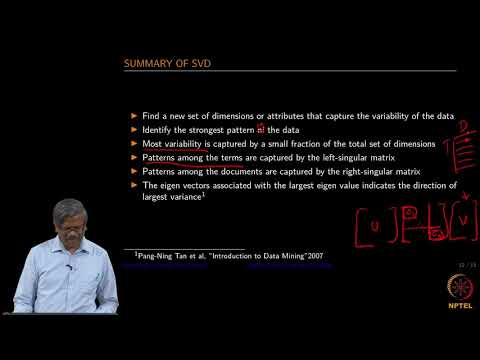

In [120]:
YouTubeVideo("Bw31wBjgagw")

# Thank You